# Installing Dependencies

In [1]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████████████████████████  | 834.1 MB 1.2 MB/s eta 0:00:48tcmalloc: large alloc 1147494400 bytes == 0x665ba000 @  0x7ff5c0d6e615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████████████████| 890.2 MB 7.0 kB/s 
     |████████████████████████████████| 24.3 MB 26.9 MB/s 
     |████████████████████████████████| 557.1 MB 12 kB/s 
     |████████████████████████████████| 317.1 MB 30 kB/s 
     |████████████████████████████████| 21.0 MB 1.2 MB/s 
     |████████████████████████████████| 849 kB 54.3 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uni

'1.13.0+cu117'

In [1]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 14608, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 14608 (delta 5), reused 16 (delta 1), pack-reused 14583
Receiving objects: 100% (14608/14608), 5.97 MiB | 18.80 MiB/s, done.
Resolving deltas: 100% (10562/10562), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 79 kB 4.5 MB/s 
     |████████████████████████████████| 151 kB 55.9 MB/s 
     |████████████████████████████████| 1.4 MB 54.7 MB/s 
     |████████████████████████████████| 548 kB 8.6 MB/s 
     |████████████████████████████████| 248 kB 28.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 843 kB 62

In [3]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# **Datasets**

In [2]:
!wget https://zenodo.org/record/7181924/files/Craters_split_dataset.zip


--2022-11-20 17:46:23--  https://zenodo.org/record/7181924/files/Craters_split_dataset.zip
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1352380399 (1.3G) [application/octet-stream]
Saving to: ‘Craters_split_dataset.zip’

Craters_split_datas 100%[===================>]   1.26G  14.5MB/s    in 90s     

2022-11-20 17:47:55 (14.3 MB/s) - ‘Craters_split_dataset.zip’ saved [1352380399/1352380399]



In [17]:
%mkdir Craters_dataset
%cd Craters_dataset
!unzip ../Craters_split_dataset
%cd ..

Streaming output truncated to the last 5000 lines.
  inflating: train_data/m1338833866le_lv2.tif_label_699.json  
  inflating: train_data/m1338833866le_lv2.tif_label_963.json  
  inflating: train_data/m1361391010le_lv2.tif_label_3149.json  
  inflating: train_data/m1325197569le_lv2.tif_label_1179.json  
  inflating: train_data/m1325197569le_lv2.tif_label_1211.json  
  inflating: train_data/m1338833866le_lv2.tif_label_876.json  
  inflating: train_data/m1288076949le_lv2.tif_label_1611.json  
  inflating: train_data/m1320016983le_lv2.tif_label_2732.tiff  
  inflating: train_data/m1338833866le_lv2.tif_label_834.json  
  inflating: train_data/m1338833866le_lv2.tif_label_89.tiff  
  inflating: train_data/m1338833866le_lv2.tif_label_698.tiff  
  inflating: train_data/m1338833866le_lv2.tif_label_1128.tiff  
  inflating: train_data/m1338833866le_lv2.tif_label_189.json  
  inflating: train_data/m112963850le_lv2.tif_label_2900.tiff  
  inflating: train_data/m1338833866le_lv2.tif_label_304.tiff  

In [13]:
!wget https://zenodo.org/record/7181923/files/Boulders_split_dataset.zip

--2022-11-20 18:00:41--  https://zenodo.org/record/7181923/files/Boulders_split_dataset.zip
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14386499 (14M) [application/octet-stream]
Saving to: ‘Boulders_split_dataset.zip’

Boulders_split_data 100%[===================>]  13.72M  6.13MB/s    in 2.2s    

2022-11-20 18:00:46 (6.13 MB/s) - ‘Boulders_split_dataset.zip’ saved [14386499/14386499]



In [18]:
%mkdir Boulders_dataset
%cd Boulders_dataset
!unzip ../Boulders_split_dataset
%cd ..
%ls

Streaming output truncated to the last 5000 lines.
  inflating: train_data/M165645700RE_lev2_label_6458.tiff  
  inflating: train_data/M165645700LE_lev2_label_2107.tiff  
  inflating: train_data/M165645700RE_lev2_label_1856.tiff  
  inflating: train_data/M165645700RE_lev2_label_5267.tiff  
  inflating: train_data/M165645700LE_lev2_label_23.tiff  
  inflating: train_data/M165645700LE_lev2_label_3703.tiff  
  inflating: train_data/M165645700LE_lev2_label_1743.tiff  
  inflating: train_data/M165645700RE_lev2_label_6688.tiff  
  inflating: train_data/M165645700RE_lev2_label_5981.tiff  
  inflating: train_data/M165645700RE_lev2_label_2032.tiff  
  inflating: train_data/M165645700LE_lev2_label_4960.tiff  
  inflating: train_data/M165645700LE_lev2_label_396.tiff  
  inflating: train_data/M165645700LE_lev2_label_5102.tiff  
  inflating: train_data/M165645700LE_lev2_label_1005.tiff  
  inflating: train_data/M165645700LE_lev2_label_1431.tiff  
  inflating: train_data/M165645700RE_lev2_label_5039

In [ ]:
!wget https://zenodo.org/record/7179842/files/EXPLORE_ML_DataChallenge_QGIS_project.zip

In [ ]:
!unzip EXPLORE_ML_DataChallenge_QGIS_project.zip
%ls

# **Craters**

In [1]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("craters", {}, "./Craters_dataset/train_data/dataset.json", 
                        "./Craters_dataset/train_data")

In [4]:
craters_metadata = MetadataCatalog.get("craters")
dataset_dicts = DatasetCatalog.get("craters")

WARNING [11/20 18:12:44 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/20 18:12:44 d2.data.datasets.coco]: Loaded 2279 images in COCO format from ./Craters_dataset/train_data/dataset.json


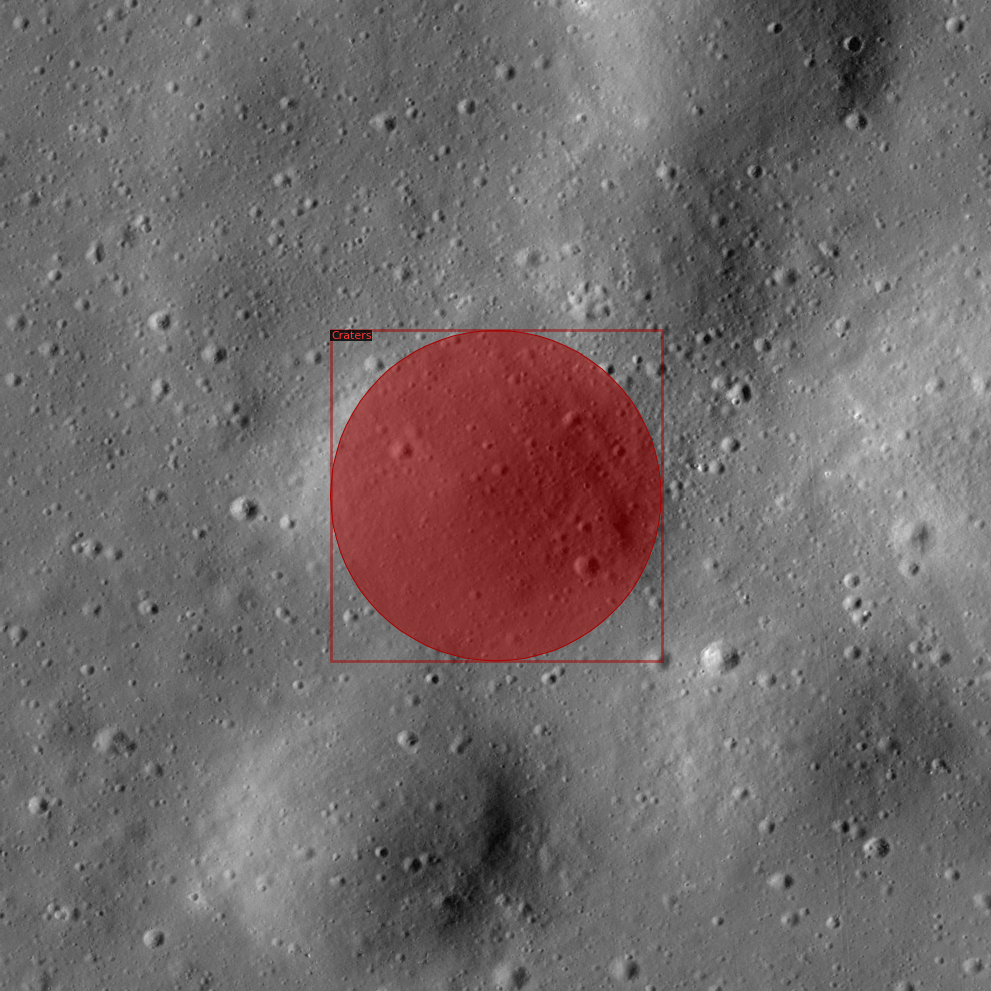

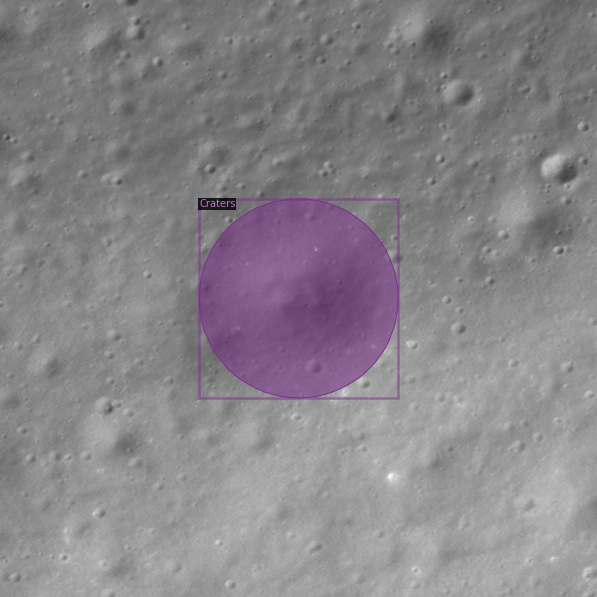

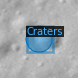

In [5]:
import random

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=craters_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [7]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("craters",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 800
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[11/20 18:24:58 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[11/20 18:25:06 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[11/20 18:25:17 d2.utils.events]:  eta: 0:03:56  iter: 19  total_loss: 1.001  loss_cls: 0.189  loss_box_reg: 0.03673  loss_mask: 0.6782  loss_rpn_cls: 0.01377  loss_rpn_loc: 0.0145  time: 0.3014  data_time: 0.0275  lr: 0.00049452  max_mem: 2029M
[11/20 18:25:23 d2.utils.events]:  eta: 0:03:43  iter: 39  total_loss: 1.045  loss_cls: 0.1648  loss_box_reg: 0.1822  loss_mask: 0.6315  loss_rpn_cls: 0.01071  loss_rpn_loc: 0.008242  time: 0.2987  data_time: 0.0086  lr: 0.00099403  max_mem: 2029M
[11/20 18:25:29 d2.utils.events]:  eta: 0:03:46  iter: 59  total_loss: 0.9273  loss_cls: 0.1437  loss_box_reg: 0.31  loss_mask: 0.4741  loss_rpn_cls: 0.009629  loss_rpn_loc: 0.00492  time: 0.3037  data_time: 0.0076  lr: 0.0014935  max_mem: 2029M
[11/20 18:25:36 d2.utils.events]:  eta: 0:03:41  iter: 79  total_loss: 0.8932  loss_cls: 0.1354  loss_box_reg: 0.4176  loss_mask: 0.3519  loss_rpn_cls: 0.001666  loss_rpn_loc: 0.004472  time: 0.3080  data_time: 0.0128  lr: 0.001993  max_mem: 2029M
[11/20 18:25

In [9]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  
cfg.DATASETS.TEST = ("craters", )
predictor_crater = DefaultPredictor(cfg)

[11/20 18:30:08 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

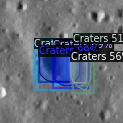

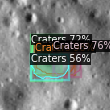

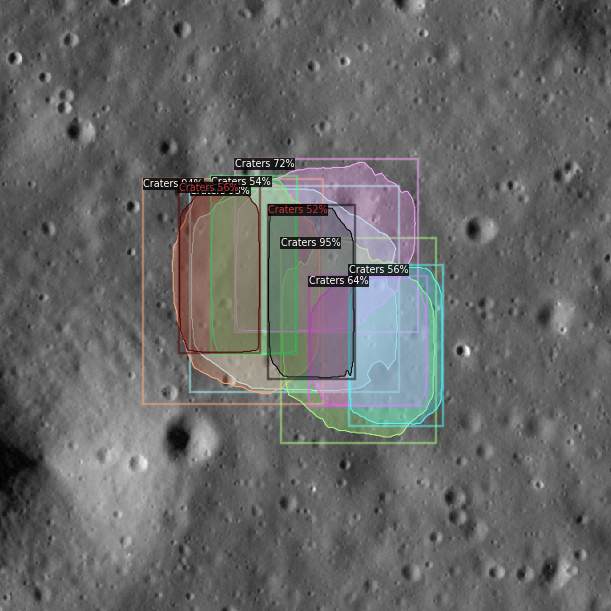

In [11]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor_crater(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=craters_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW  
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
img = cv2.imread('./QGIS/Visible.png')
outputs = predictor_crater(im)
v = Visualizer(im[:, :, ::-1],
                metadata=craters_metadata, 
                scale=0.8, 
                instance_mode=ColorMode.IMAGE_BW  
)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [12]:
craters_metadata

Metadata(evaluator_type='coco', image_root='./Craters_dataset/train_data', json_file='./Craters_dataset/train_data/dataset.json', name='craters', thing_classes=['Craters'], thing_dataset_id_to_contiguous_id={0: 0})

# **Boulders**

In [14]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("boulders", {}, "./Boulders_dataset/train_data/dataset.json", 
                        "./Boulders_dataset/train_data")

In [27]:
boulders_metadata = MetadataCatalog.get("boulders")
dataset_dicts = DatasetCatalog.get("boulders")

WARNING [11/20 18:56:28 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/20 18:56:28 d2.data.datasets.coco]: Loaded 5942 images in COCO format from ./Boulders_dataset/train_data/dataset.json


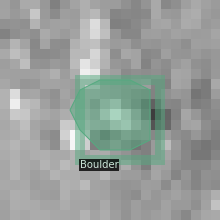

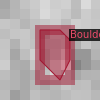

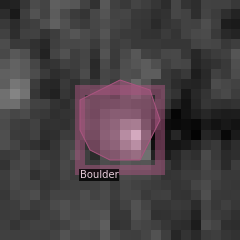

In [28]:
import random

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=craters_metadata, scale=10)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [22]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("craters",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 800
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[11/20 18:49:11 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[11/20 18:49:12 d2.engine.train_loop]: Starting training from iteration 0
[11/20 18:49:20 d2.utils.events]:  eta: 0:04:02  iter: 19  total_loss: 0.9999  loss_cls: 0.1736  loss_box_reg: 0.03361  loss_mask: 0.673  loss_rpn_cls: 0.01724  loss_rpn_loc: 0.01454  time: 0.3916  data_time: 0.0950  lr: 0.00049452  max_mem: 3453M
[11/20 18:49:26 d2.utils.events]:  eta: 0:03:56  iter: 39  total_loss: 1.024  loss_cls: 0.1394  loss_box_reg: 0.1482  loss_mask: 0.6624  loss_rpn_cls: 0.005268  loss_rpn_loc: 0.007722  time: 0.3497  data_time: 0.0104  lr: 0.00099403  max_mem: 3453M
[11/20 18:49:32 d2.utils.events]:  eta: 0:03:49  iter: 59  total_loss: 0.8997  loss_cls: 0.1545  loss_box_reg: 0.2686  loss_mask: 0.5079  loss_rpn_cls: 0.003242  loss_rpn_loc: 0.004311  time: 0.3366  data_time: 0.0097  lr: 0.0014935  max_mem: 3453M
[11/20 18:49:39 d2.utils.events]:  eta: 0:03:45  iter: 79  total_loss: 0.7524  loss_cls: 0.1137  loss_box_reg: 0.2711  loss_mask: 0.3546  loss_rpn_cls: 0.0004319  loss_rpn_loc: 0.0

In [23]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  
cfg.DATASETS.TEST = ("boulders", )
predictor_boulder = DefaultPredictor(cfg)

[11/20 18:54:32 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

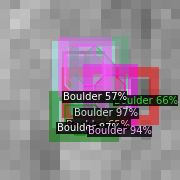

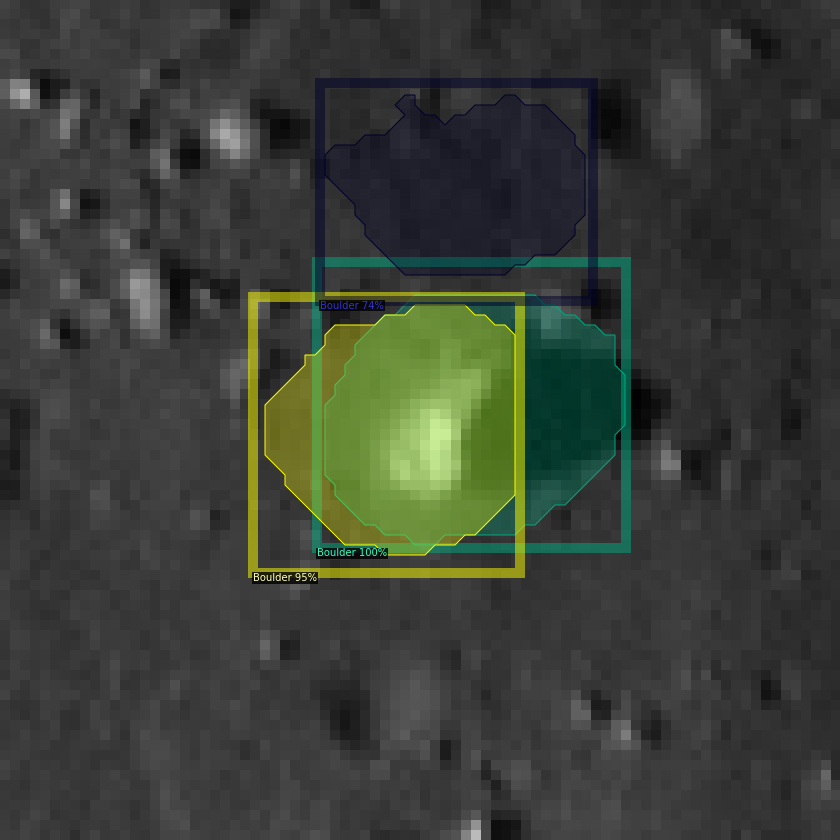

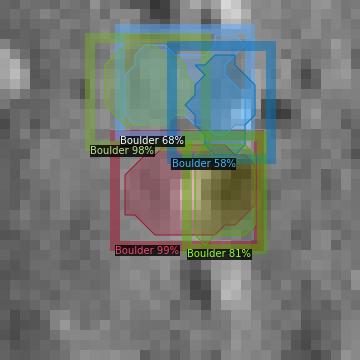

In [31]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor_boulder(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=craters_metadata, 
                   scale=10, 
                   instance_mode=ColorMode.IMAGE_BW  
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
img = cv2.imread('./QGIS/Visible.png')
outputs = predictor_boulder(im)
v = Visualizer(im[:, :, ::-1],
                metadata=craters_metadata, 
                scale=10, 
                instance_mode=ColorMode.IMAGE_BW  
)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [29]:
boulders_metadata

Metadata(evaluator_type='coco', image_root='./Boulders_dataset/train_data', json_file='./Boulders_dataset/train_data/dataset.json', name='boulders', thing_classes=['Boulder'], thing_dataset_id_to_contiguous_id={0: 0})